In [1]:
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors

In [2]:
sc = SparkContext()
sqlContext = SQLContext(sc)
spark = SparkSession(sc)

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
sns.set()
style.use('ggplot')

In [5]:
account = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\account.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

df_account = account.toPandas()
df_account

,account_id,district_id,frequency,date_account
0,576,55,POPLATEK MESICNE,01/01/1993
1,3818,74,POPLATEK MESICNE,01/01/1993
2,704,55,POPLATEK MESICNE,01/01/1993
3,2378,16,POPLATEK MESICNE,01/01/1993
4,2632,24,POPLATEK MESICNE,02/01/1993
5,1972,77,POPLATEK MESICNE,02/01/1993
6,1539,1,POPLATEK PO OBRATU,03/01/1993
7,793,47,POPLATEK MESICNE,03/01/1993
8,2484,74,POPLATEK MESICNE,03/01/1993
9,1695,76,POPLATEK MESICNE,03/01/1993


In [6]:
client = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\client.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

df_client = client.toPandas()
df_client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
5,6,190922,12
6,7,290125,15
7,8,385221,51
8,9,351016,60
9,10,430501,57


In [7]:
disp = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\disp.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

df_disp = disp.toPandas()
df_disp

,disp_id,client_id,account_id,type_disp
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
5,6,6,4,OWNER
6,7,7,5,OWNER
7,8,8,6,OWNER
8,9,9,7,OWNER
9,10,10,8,OWNER


In [8]:
trans = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\trans.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [9]:
df_trans = trans.toPandas()
df_trans

,trans_id,account_id,date_trans,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,01/01/1993,PRIJEM,VKLAD,700.0,700.0,None,None,NaN
1,171812,576,01/01/1993,PRIJEM,VKLAD,900.0,900.0,None,None,NaN
2,207264,704,01/01/1993,PRIJEM,VKLAD,1000.0,1000.0,None,None,NaN
3,1117247,3818,01/01/1993,PRIJEM,VKLAD,600.0,600.0,None,None,NaN
4,579373,1972,02/01/1993,PRIJEM,VKLAD,400.0,400.0,None,None,NaN
5,771035,2632,02/01/1993,PRIJEM,VKLAD,1100.0,1100.0,None,None,NaN
6,452728,1539,03/01/1993,PRIJEM,VKLAD,600.0,600.0,None,None,NaN
7,725751,2484,03/01/1993,PRIJEM,VKLAD,1100.0,1100.0,None,None,NaN
8,497211,1695,03/01/1993,PRIJEM,VKLAD,200.0,200.0,None,None,NaN
9,232960,793,03/01/1993,PRIJEM,VKLAD,800.0,800.0,None,None,NaN


In [10]:
df_joined = pd.merge(df_account, df_trans, on="account_id")
df_joined = pd.merge(df_joined, df_disp, on="account_id")
df_joined = pd.merge(df_joined, df_client, on=["client_id", "district_id"])

In [11]:
df_joined.dtypes

account_id        int32
district_id       int32
frequency        object
date_account     object
trans_id          int32
date_trans       object
type             object
operation        object
amount          float64
balance         float64
k_symbol         object
bank             object
account         float64
disp_id           int32
client_id         int32
type_disp        object
birth_number      int32
dtype: object

In [12]:
df_joined = df_joined.drop_duplicates()

In [13]:
df_joined = df_joined.drop(['district_id', 'operation', 'account', 'birth_number', 
              'bank', 'k_symbol', 'balance'], axis=1)

In [14]:
temp = df_joined.groupby(by=['client_id', 'trans_id'], as_index=False)['amount'].sum()
total_amount = temp.rename(columns = {'amount':'total_amount'})

In [15]:
df_joined['date_trans'] = pd.to_datetime(df_joined['date_trans'])
df_joined['date_account'] = pd.to_datetime(df_joined['date_account'])

In [16]:
df_joined['date_trans_int'] = df_joined['date_trans'].astype('int64')

In [17]:
temp = df_joined.groupby(by=['client_id', 'trans_id'], as_index=False)['date_trans_int'].mean()

In [18]:
df_joined.drop('date_trans_int', axis = 1, inplace = True)

In [19]:
total_amount.loc[:, 'date_trans'] = pd.to_datetime(temp['date_trans_int'])

In [20]:
total_amount = total_amount[total_amount['total_amount'] > 0]

In [21]:
lastDate = df_joined['date_trans'].max()

In [22]:
print ('Most recent invoice is from:')
lastDate

Most recent invoice is from:


Timestamp('1998-12-31 00:00:00')

In [23]:
total_amount['date_trans'] = pd.to_datetime(total_amount['date_trans'])

In [24]:
rfmTable = total_amount.groupby('client_id').agg({'date_trans': lambda x: (lastDate - x.max()).days, 
                                           'trans_id': lambda x: len(x), 
                                           'total_amount': lambda x: x.sum()})

In [25]:
rfmTable['date_trans'] = rfmTable['date_trans'].astype(int)

In [26]:
rfmTable.rename(columns={'date_trans': 'Recency', 
                         'trans_id': 'Frequency', 
                         'total_amount': 'Monetary'}, inplace=True)

In [27]:
f_score = []
m_score = []
r_score = []

In [28]:
columns = ['Frequency', 'Monetary']
scores_str = ['f_score', 'm_score']

In [29]:
scores = [f_score, m_score]

In [30]:
import numpy as np

In [31]:
for n in range(len(columns)):
    # Order by column
    rfmTable = rfmTable.sort_values(columns[n], ascending=False)
    
    # Create new index
    refs = np.arange(1,4876)
    rfmTable['refs'] = refs
    
    # Add score
    for i, row in rfmTable.iterrows():
        if row['refs'] <= 866:
            scores[n].append(5)
        elif row['refs'] > 866 and row['refs'] <= 866*2:
            scores[n].append(4)
        elif row['refs'] > 866*2 and row['refs'] <= 866*3:
            scores[n].append(3)
        elif row['refs'] > 866*3 and row['refs'] <= 866*4:
            scores[n].append(2)
        else: 
            scores[n].append(1)

    # Create f_score column
    rfmTable[scores_str[n]] = scores[n]

In [32]:
# For recency, we do the opposite: most recents are better, so we order as ascending
rfmTable = rfmTable.sort_values('Recency', ascending=True)

In [33]:
# Recreate index
refs = np.arange(1,4876)
rfmTable['refs'] = refs

In [34]:
# Add score
for i, row in rfmTable.iterrows():
    if row['refs'] <= 866:
        r_score.append(5)
    elif row['refs'] > 866 and row['refs'] <= 866*2:
        r_score.append(4)
    elif row['refs'] > 866*2 and row['refs'] <= 866*3:
        r_score.append(3)
    elif row['refs'] > 866*3 and row['refs'] <= 866*4:
        r_score.append(2)
    else: 
        r_score.append(1)

In [35]:
rfmTable['r_score'] = r_score

In [36]:
rfmTable['rfm_score'] = rfmTable[['r_score','f_score','m_score']].sum(axis=1)

In [37]:
rfmTable['rfm_score'].min()

3

In [38]:
rfmTable['rfm_score'].max()

15

In [39]:
rfmTableScores = rfmTable.drop(['Frequency', 'Monetary', 'Recency', 'refs', 'rfm_score'], axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
data_log = np.log(rfmTableScores)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=rfmTableScores.index, columns=rfmTableScores.columns)

In [42]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(data_normalized) 

In [44]:
tmp = pd.DataFrame(reduced, columns=['x', 'y']) 

In [45]:
tmp

,x,y
0,-0.873590,-1.780011
1,0.573707,-1.187097
2,0.573707,-1.187097
3,1.554347,-0.013700
4,0.935632,-0.754031
5,0.935632,-0.754031
6,0.573707,-1.187097
7,0.935632,-0.754031
8,1.554347,-0.013700
9,0.935632,-0.754031


In [46]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

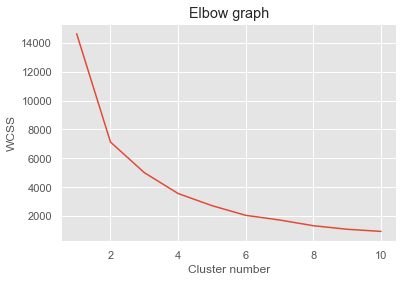

In [47]:
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [48]:
km = KMeans(n_clusters=4)
clusters = km.fit(data_normalized)
cluster_labels = clusters.labels_
clusters = km.fit_predict(data_normalized)

In [49]:
rfmTable['cluster'] = clusters

In [50]:
c1 = rfmTable[rfmTable.cluster == 0]
c2 = rfmTable[rfmTable.cluster == 1]
c3 = rfmTable[rfmTable.cluster == 2]
c4 = rfmTable[rfmTable.cluster == 3]

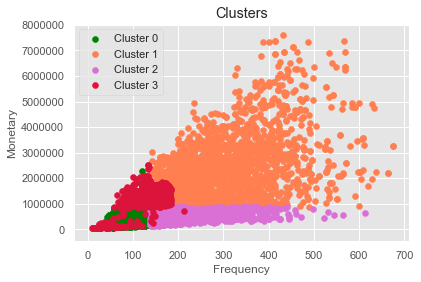

In [51]:
plt.scatter(c1.Frequency, c1.Monetary, c = 'green', label = 'Cluster 0')
plt.scatter(c2.Frequency, c2.Monetary, c = 'coral', label = 'Cluster 1')
plt.scatter(c3.Frequency, c3.Monetary, c = 'orchid', label = 'Cluster 2')
plt.scatter(c4.Frequency, c4.Monetary, c = 'crimson', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

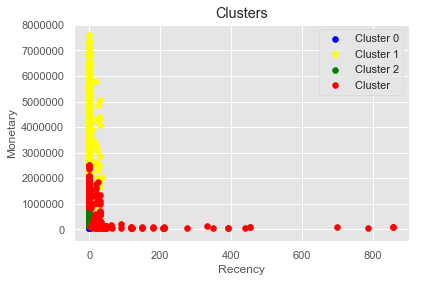

In [52]:
plt.scatter(c1.Recency, c1.Monetary, c = 'blue', label = 'Cluster 0')
plt.scatter(c2.Recency, c2.Monetary, c = 'yellow', label = 'Cluster 1')
plt.scatter(c3.Recency, c3.Monetary, c = 'green', label = 'Cluster 2')
plt.scatter(c4.Recency, c4.Monetary, c = 'red', label = 'Cluster ')

plt.title('Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()

In [53]:
data_rfm = rfmTableScores.assign(Cluster=cluster_labels)

In [54]:
grouped = data_rfm.groupby(['Cluster'])
grouped.agg({
    'r_score': 'mean',
    'f_score': 'mean',
    'm_score': 'mean'
  }).round(1)

,r_score,f_score,m_score
Cluster,,,
0,4.4,3.5,1.9
1,1.0,1.4,3.0
2,1.7,4.0,4.3
3,3.9,1.2,1.3


In [55]:
data_melt = pd.melt(
                    data_rfm.reset_index(),               
                    id_vars=['client_id', 'Cluster'],
                    value_vars=['r_score', 'f_score', 'm_score'], 
                    var_name='Metric', value_name='Value'
                    )

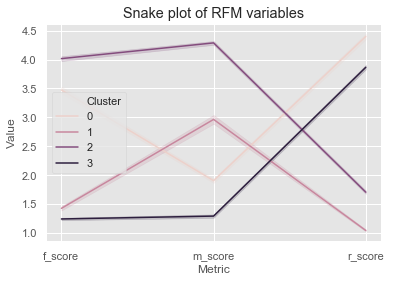

In [56]:
# Snake Plot
plt.title('Snake plot of RFM variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [57]:
tmp['cluster'] = clusters

In [58]:
tmp

,x,y,cluster
0,-0.873590,-1.780011,1
1,0.573707,-1.187097,2
2,0.573707,-1.187097,2
3,1.554347,-0.013700,0
4,0.935632,-0.754031,2
5,0.935632,-0.754031,2
6,0.573707,-1.187097,2
7,0.935632,-0.754031,2
8,1.554347,-0.013700,0
9,0.935632,-0.754031,2


In [59]:
tmp['cluster'] = clusters

In [60]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

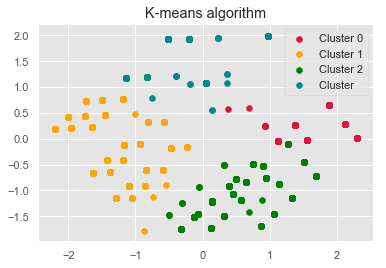

In [61]:
plt.scatter(c1.x, c1.y, c = 'crimson', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'orange', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'green', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'darkcyan', label = 'Cluster ')

plt.title('K-means algorithm')
plt.legend()

In [62]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(reduced)
labels = gmm.predict(reduced)

In [63]:
tmp['cluster'] = labels

In [64]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

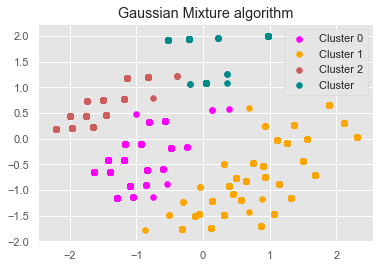

In [65]:
plt.scatter(c1.x, c1.y, c = 'magenta', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'orange', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'indianred', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'darkcyan', label = 'Cluster ')

plt.title('Gaussian Mixture algorithm')
plt.legend()

In [66]:
#Applying EM algorithm
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [67]:
centers, labels = find_clusters(reduced, 4)

In [68]:
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [69]:
tmp['cluster'] = labels

In [70]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

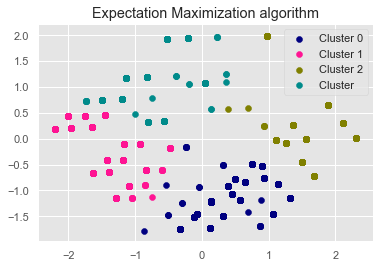

In [71]:
plt.scatter(c1.x, c1.y, c = 'navy', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'deeppink', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'olive', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'darkcyan', label = 'Cluster ')

plt.title('Expectation Maximization algorithm')
plt.legend()

In [72]:
#Mean Shift 
from sklearn.cluster import MeanShift, estimate_bandwidth

In [73]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(reduced, quantile=0.25, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(reduced)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 4


In [74]:
labels

array([0, 2, 2, ..., 3, 3, 3], dtype=int64)

In [75]:
tmp['cluster'] = labels

In [76]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

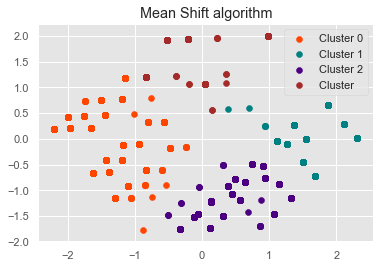

In [77]:
plt.scatter(c1.x, c1.y, c = 'orangered', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'teal', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'indigo', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'brown', label = 'Cluster ')

plt.title('Mean Shift algorithm')
plt.legend()

In [78]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5).fit(reduced)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
lab = db.labels_

In [79]:
n_clusters_ = len(set(lab)) - (1 if -1 in lab else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


In [80]:
tmp['cluster'] = lab

In [81]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

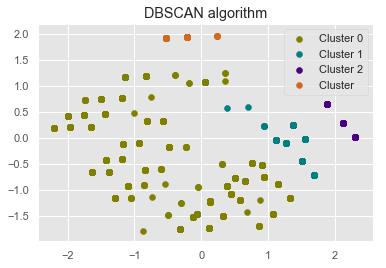

In [82]:
plt.scatter(c1.x, c1.y, c = 'olive', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'teal', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'indigo', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'chocolate', label = 'Cluster ')

plt.title('DBSCAN algorithm')
plt.legend()